# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2381 Ваньков Ярослав Сергеевич и Вакуленко Инна Юрьевна. Бригада №4.


## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).


## Основные теоретические положения

### Дискретное преобразование Фурье

Рассмотрим периодический дискретный сигнал $x[n]$. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье:

$$X[k] = \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

где $k$ — номер гармоники, $\omega_k = \frac{2\pi k}{N}$ — соответствующая круговая частота.

### Нерекурсивные фильтры

Нерекурсивные фильтры (FIR-фильтры) основаны на полиномиальном сглаживании и имеют передаточную функцию вида:

$$H(\omega) = \sum_{k=-m}^{m} h_k e^{-i\omega k}$$

где $h_k$ — коэффициенты фильтра, определяемые методом наименьших квадратов при аппроксимации полиномом.


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

**Порядок выполнения работы:**

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$.
2. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$.
3. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом. Начальные фазы $\varphi_k$ — случайные числа в промежутке от 0 до 0.5.
4. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).
5. Визуализировать исходные аналоговый и дискретизированный сигналы.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
7. Применить следующие фильтры:
   - Линейное сглаживание по 5 и 9 точкам
   - Сглаживание полиномом 2-й степени по 5 и 9 точкам
   - Сглаживание полиномом 4-й степени по 7 и 11 точкам
8. Для каждого фильтра визуализировать сглаженный сигнал и его спектр.
9. Проанализировать результаты и сделать выводы.


## Выполнение работы

### 1. Импорт библиотек и параметры


In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

n = 11  # количество гармоник
N = 32  # количество отсчетов
dw = math.pi * 0.1  # шаг частоты
T = 1  # период дискретизации

### 2. Генерация коэффициентов косинусоид

Сгенерируем случайные амплитуды и фазы для 11 гармоник.


In [2]:
random.seed(4)  # используем номер бригады для воспроизводимости

# Генерация частот
w = [dw * i for i in range(n)]

# Генерация амплитуд (случайная перестановка от 1 до 11)
A = list(range(1, n + 1))
random.shuffle(A)

# Генерация фаз (случайные числа от 0 до 0.5)
phi = [random.uniform(0, 0.5) for _ in range(n)]

print("Сгенерированные коэффициенты гармонических сигналов:")
print(f"Частоты ω: {[round(wi, 4) for wi in w]}")
print(f"Амплитуды A: {A}")
print(f"Фазы φ: {[round(p, 4) for p in phi]}")

Сгенерированные коэффициенты гармонических сигналов:
Частоты ω: [0.0, 0.3142, 0.6283, 0.9425, 1.2566, 1.5708, 1.885, 2.1991, 2.5133, 2.8274, 3.1416]
Амплитуды A: [3, 6, 8, 10, 1, 9, 11, 7, 2, 5, 4]
Фазы φ: [0.2747, 0.1447, 0.495, 0.0294, 0.2602, 0.1801, 0.3899, 0.4134, 0.1309, 0.4715, 0.0128]


### 3. Формирование аналогового и дискретного сигналов

Исходный аналоговый сигнал:

$$s(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:

$$s[n] = \sum_{k=0}^{10} A_k \cos(\omega_k n + \varphi_k), \quad n = 0, 1, \ldots, 31$$


In [3]:
# Функция аналогового сигнала
def s(t):
    return sum([A[i] * math.cos(w[i]*t + phi[i]) for i in range(n)])

# Дискретные отсчёты
Xn = list(range(N))
S = [s(x) for x in Xn]

# Отсчёты для графика аналогового сигнала (более плотная сетка)
X_analog = [i * N / 4096 for i in range(4096)]
S_analog = [s(x) for x in X_analog]

### 4. Визуализация исходного аналогового и дискретизированного сигналов


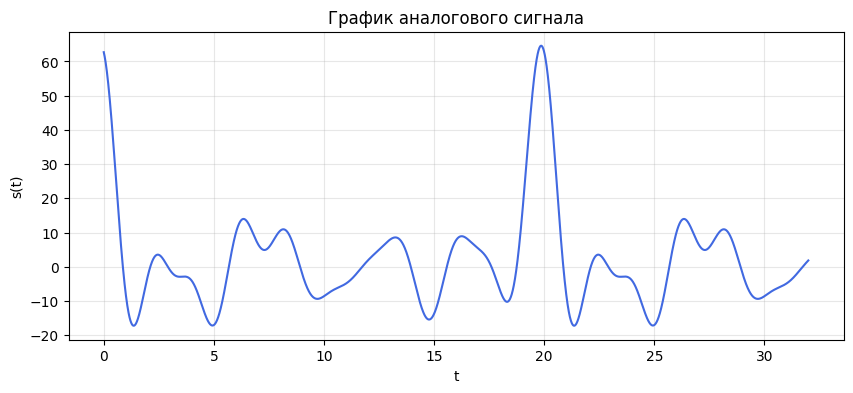

In [4]:
# График аналогового сигнала
plt.figure(figsize=(10, 4))
plt.plot(X_analog, S_analog, color='royalblue', linewidth=1.5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('График аналогового сигнала')
plt.grid(True, alpha=0.3)
plt.show()

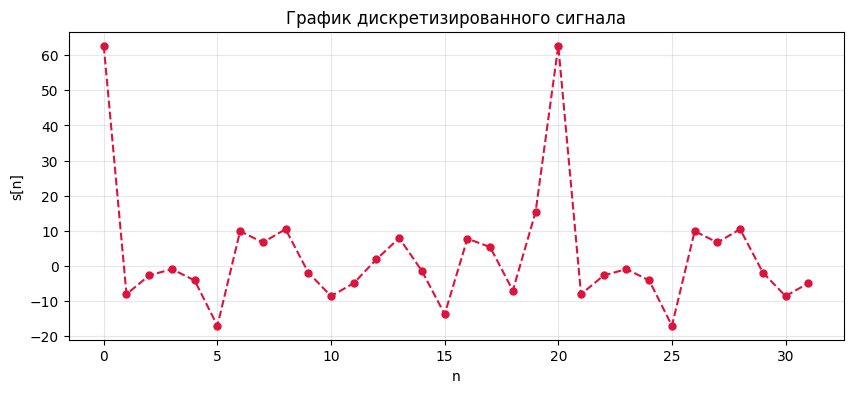

In [5]:
# График дискретизированного сигнала
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', linewidth=1.5, markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('График дискретизированного сигнала')
plt.grid(True, alpha=0.3)
plt.show()

### 5. Дискретные отсчеты спектра дискретного сигнала

Применим дискретное преобразование Фурье для нахождения спектра исходного сигнала.


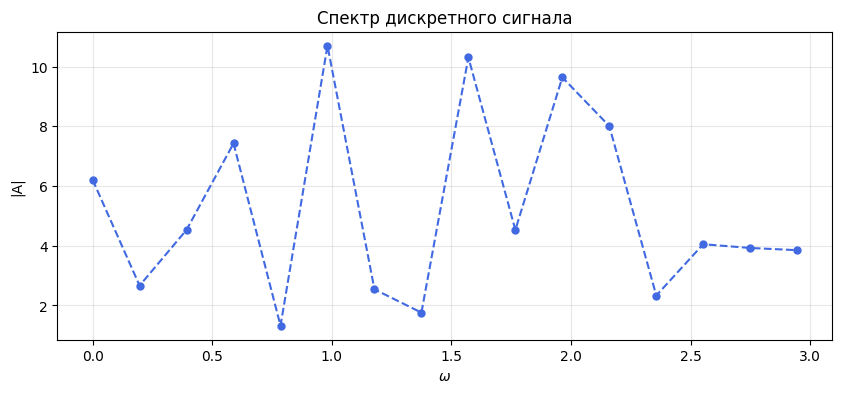

In [6]:
# Преобразование Фурье для исходного сигнала
W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S, norm='forward')[:N // 2] * 2

# График спектра исходного сигнала
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', linewidth=1.5, markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала')
plt.grid(True, alpha=0.3)
plt.show()

### 6. Линейное сглаживание по 5 и 9 точкам

Формулы передаточной функции для линейного сглаживания:

**Линейное сглаживание по 5 точкам:**

$$y[n] = \frac{1}{5}(x[n-2] + x[n-1] + x[n] + x[n+1] + x[n+2])$$

$$H(\omega) = \frac{1}{5}(e^{2i\omega} + e^{i\omega} + 1 + e^{-i\omega} + e^{-2i\omega}) = \frac{1 + 2\cos(\omega) + 2\cos(2\omega)}{5}$$

**Линейное сглаживание по 9 точкам:**

$$y[n] = \frac{1}{9}\sum_{k=-4}^{4} x[n+k]$$

$$H(\omega) = \frac{1 + 2\sum_{k=1}^{4}\cos(k\omega)}{9}$$


In [7]:
# Линейное сглаживание по 5 точкам
def L_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2]) / 5)
    return ([0] * 2) + y + ([0] * 2)

# Линейное сглаживание по 9 точкам
def L_9(S):
    y = []
    for i in range(4, N - 4):
        y.append(sum([S[i+k] for k in range(-4, 5)]) / 9)
    return ([0] * 4) + y + ([0] * 4)

Y_L_5 = L_5(S)
Y_L_9 = L_9(S)

### 7. Визуализация сглаженных сигналов (линейное сглаживание)


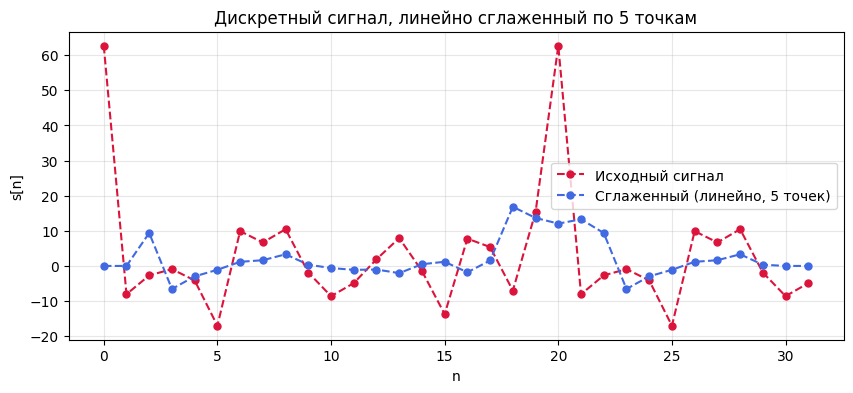

In [8]:
# Сглаженный сигнал (линейно 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_L_5, 'o--', color='royalblue', label='Сглаженный (линейно, 5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, линейно сглаженный по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

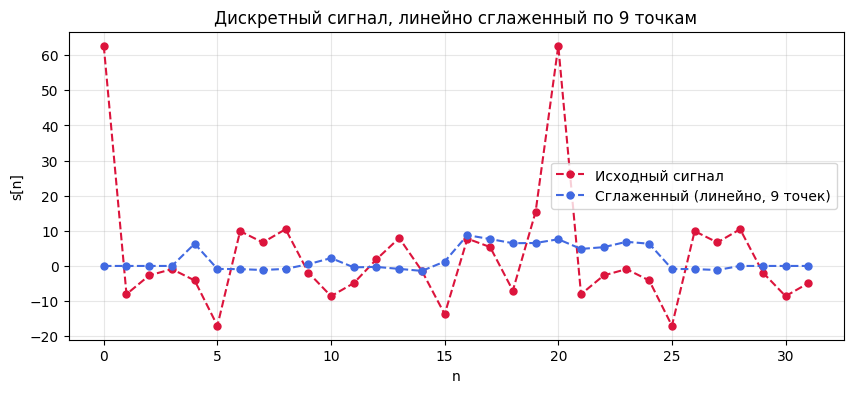

In [9]:
# Сглаженный сигнал (линейно 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_L_9, 'o--', color='royalblue', label='Сглаженный (линейно, 9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, линейно сглаженный по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### 8. Спектры сглаженных сигналов (линейное сглаживание)


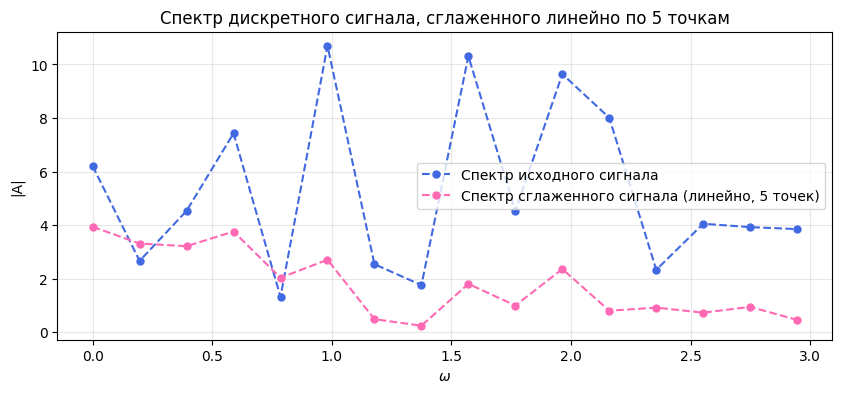

In [10]:
# Преобразование Фурье для сглаженных сигналов (линейное)
F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

# Спектр сглаженного сигнала (линейный 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_5], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного линейно по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

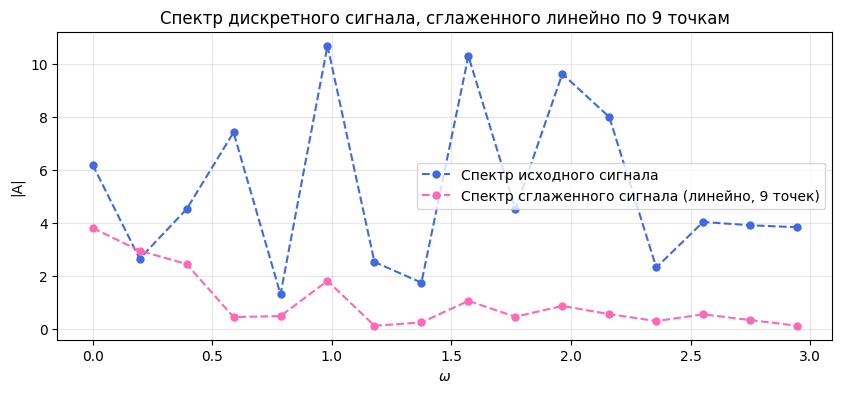

In [11]:
# Спектр сглаженного сигнала (линейный 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_9], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного линейно по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Интерпретация:** В результате фильтрации амплитуды сигналов подавляются, причём чем дальше от нуля, тем заметнее. При увеличении количества точек спектр сильнее сглаживается, то есть происходит более сильное подавление более высоких частот. Полученный результат соответствует значениям $H(\omega)$, полученным в предыдущей практической работе.


### 9. Сглаживание полиномом 2-й степени по 5 и 9 точкам

Формулы передаточной функции для сглаживания полиномом 2-й степени:

**Сглаживание по 5 точкам:**

$$y[n] = \frac{1}{35}(-3x[n-2] + 12x[n-1] + 17x[n] + 12x[n+1] - 3x[n+2])$$

$$H(\omega) = \frac{-3(e^{2i\omega} + e^{-2i\omega}) + 12(e^{i\omega} + e^{-i\omega}) + 17}{35} = \frac{17 + 24\cos(\omega) - 6\cos(2\omega)}{35}$$

**Сглаживание по 9 точкам:**

$$y[n] = \frac{1}{231}(-21x[n-4] + 14x[n-3] + 39x[n-2] + 54x[n-1] + 59x[n] + 54x[n+1] + 39x[n+2] + 14x[n+3] - 21x[n+4])$$

$$H(\omega) = \frac{59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega)}{231}$$


In [12]:
# Сглаживание второй степени по 5 точкам
def S_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((-3*S[i-2] + 12*S[i-1] + 17*S[i] + 12*S[i+1] - 3*S[i+2]) / 35)
    return ([0] * 2) + y + ([0] * 2)

# Сглаживание второй степени по 9 точкам
def S_9(S):
    y = []
    for i in range(4, N - 4):
        y.append((
            -21*S[i-4] + 14*S[i-3] + 39*S[i-2] + 54*S[i-1] + 59*S[i] +
            54*S[i+1] + 39*S[i+2] + 14*S[i+3] - 21*S[i+4]
        ) / 231)
    return ([0] * 4) + y + ([0] * 4)

Y_S_5 = S_5(S)
Y_S_9 = S_9(S)

### 10. Визуализация сглаженных сигналов (полином 2-й степени)


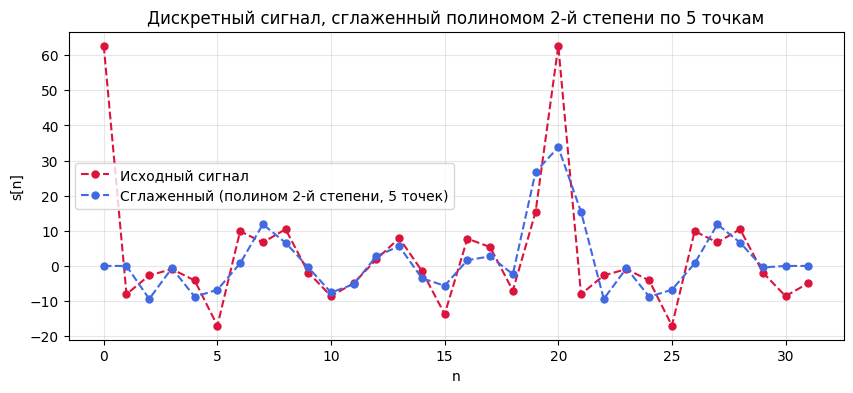

In [13]:
# Сглаженный сигнал (второй степени 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_S_5, 'o--', color='royalblue', label='Сглаженный (полином 2-й степени, 5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 2-й степени по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

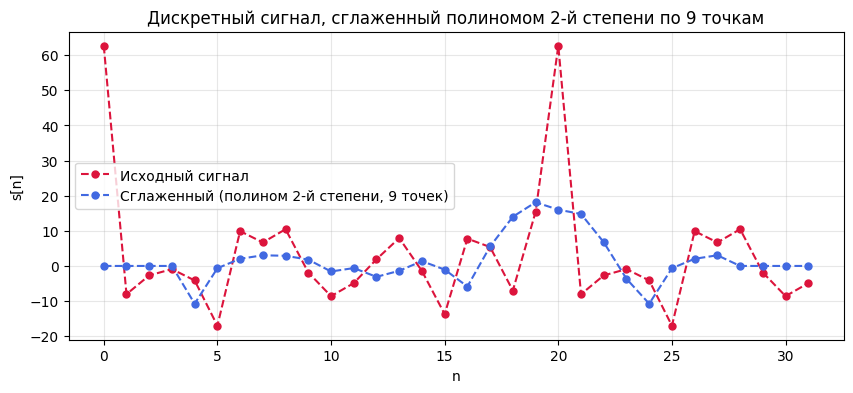

In [14]:
# Сглаженный сигнал (второй степени 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_S_9, 'o--', color='royalblue', label='Сглаженный (полином 2-й степени, 9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 2-й степени по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### 11. Спектры сглаженных сигналов (полином 2-й степени)


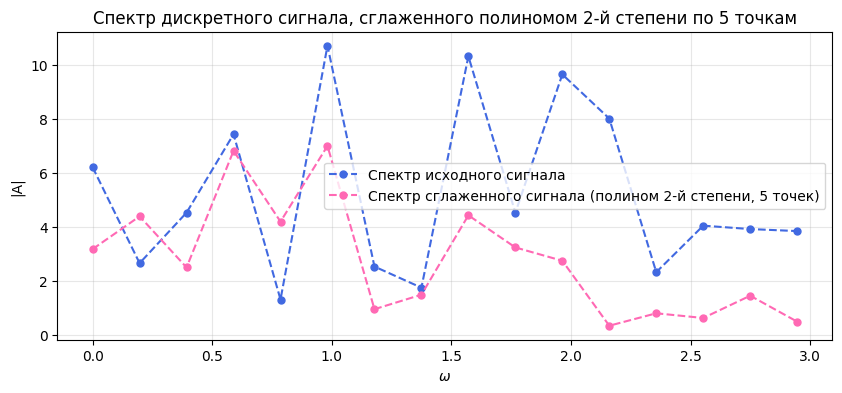

In [15]:
# Преобразование Фурье для сглаженных сигналов (второй степени)
F_S_5 = np.fft.fft(Y_S_5, norm='forward')[:N // 2] * 2
F_S_9 = np.fft.fft(Y_S_9, norm='forward')[:N // 2] * 2

# Спектр сглаженного сигнала (второй степени 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_S_5], 'o--', color='hotpink', label='Спектр сглаженного сигнала (полином 2-й степени, 5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного полиномом 2-й степени по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

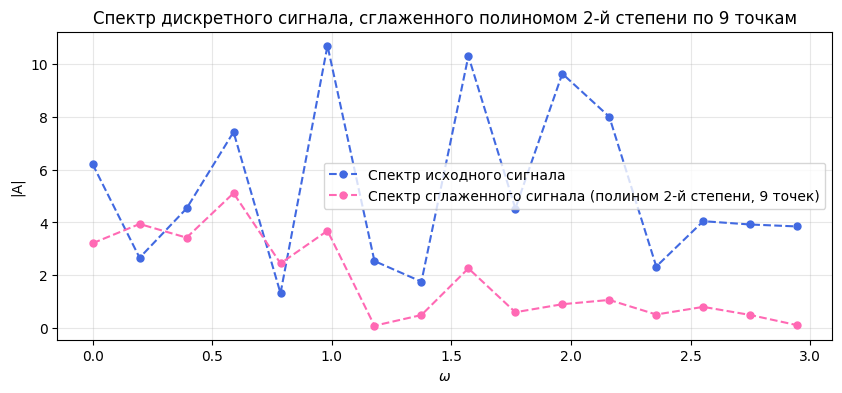

In [16]:
# Спектр сглаженного сигнала (второй степени 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_S_9], 'o--', color='hotpink', label='Спектр сглаженного сигнала (полином 2-й степени, 9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного полиномом 2-й степени по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Интерпретация:** На данных графиках видно, что полоса пропускания стала шире относительно предыдущего фильтра, при удалении от 0 полоса пропускания уменьшается. При увеличении количества точек полоса пропускания уменьшается. Полученный результат соответствует значениям $H(\omega)$, полученным в предыдущей практической работе.


### 12. Сглаживание полиномом 4-й степени по 7 и 11 точкам

Формулы передаточной функции для сглаживания полиномом 4-й степени:

**Сглаживание по 7 точкам:**

$$y[n] = \frac{1}{231}(5x[n-3] - 30x[n-2] + 75x[n-1] + 131x[n] + 75x[n+1] - 30x[n+2] + 5x[n+3])$$

$$H(\omega) = \frac{131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega)}{231}$$

**Сглаживание по 11 точкам:**

$$y[n] = \frac{1}{429}(18x[n-5] - 45x[n-4] - 10x[n-3] + 60x[n-2] + 120x[n-1] + 143x[n] + 120x[n+1] + 60x[n+2] - 10x[n+3] - 45x[n+4] + 18x[n+5])$$

$$H(\omega) = \frac{143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega)}{429}$$


In [17]:
# Сглаживание четвёртой степени по 7 точкам
def Q_7(S):
    y = []
    for i in range(3, N - 3):
        y.append((
            5*S[i-3] - 30*S[i-2] + 75*S[i-1] + 131*S[i]
            + 75*S[i+1] - 30*S[i+2] + 5*S[i+3]
        ) / 231)
    return ([0] * 3) + y + ([0] * 3)

# Сглаживание четвёртой степени по 11 точкам
def Q_11(S):
    y = []
    for i in range(5, N - 5):
        y.append((
            18*S[i-5] - 45*S[i-4] - 10*S[i-3] + 60*S[i-2] + 120*S[i-1] + 143*S[i] +
            120*S[i+1] + 60*S[i+2] - 10*S[i+3] - 45*S[i+4] + 18*S[i+5]
        ) / 429)
    return ([0] * 5) + y + ([0] * 5)

Y_Q_7 = Q_7(S)
Y_Q_11 = Q_11(S)

### 13. Визуализация сглаженных сигналов (полином 4-й степени)


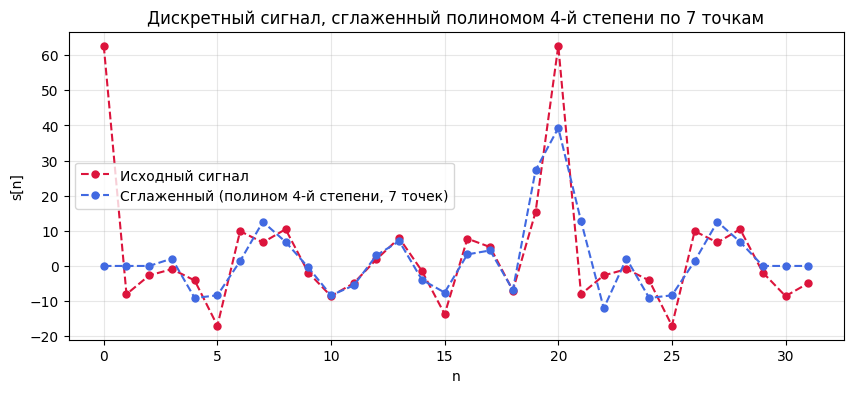

In [18]:
# Сглаженный сигнал (четвёртой степени 7 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_Q_7, 'o--', color='royalblue', label='Сглаженный (полином 4-й степени, 7 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 4-й степени по 7 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

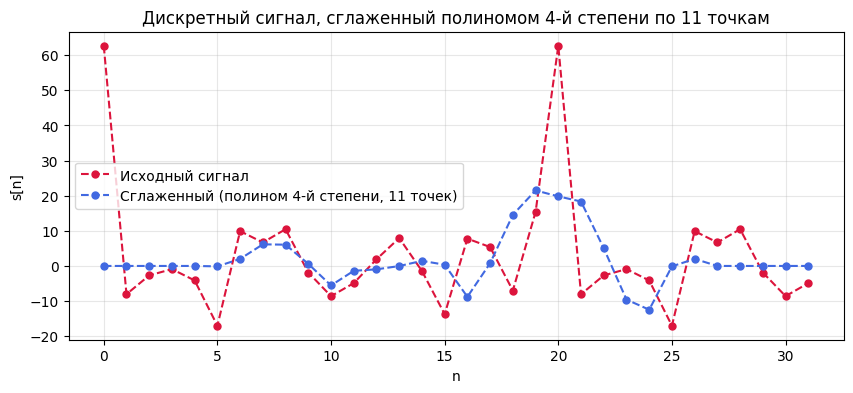

In [19]:
# Сглаженный сигнал (четвёртой степени 11 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_Q_11, 'o--', color='royalblue', label='Сглаженный (полином 4-й степени, 11 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 4-й степени по 11 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### 14. Спектры сглаженных сигналов (полином 4-й степени)


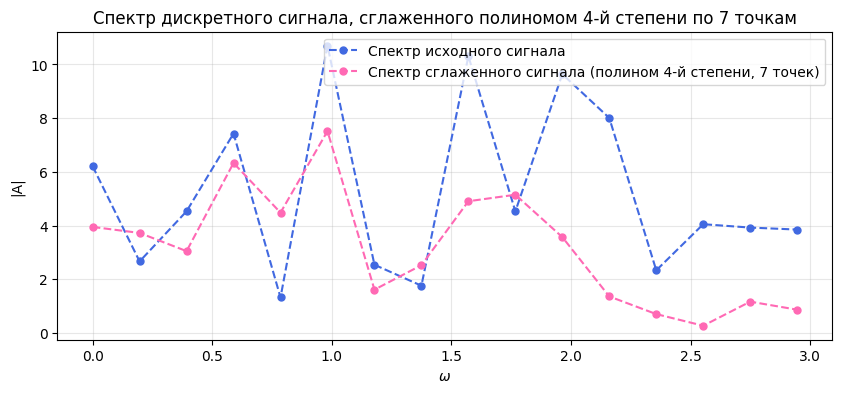

In [20]:
# Преобразование Фурье для сглаженных сигналов (четвёртой степени)
F_Q_7 = np.fft.fft(Y_Q_7, norm='forward')[:N // 2] * 2
F_Q_11 = np.fft.fft(Y_Q_11, norm='forward')[:N // 2] * 2

# Спектр сглаженного сигнала (четвёртой степени 7 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_Q_7], 'o--', color='hotpink', label='Спектр сглаженного сигнала (полином 4-й степени, 7 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного полиномом 4-й степени по 7 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

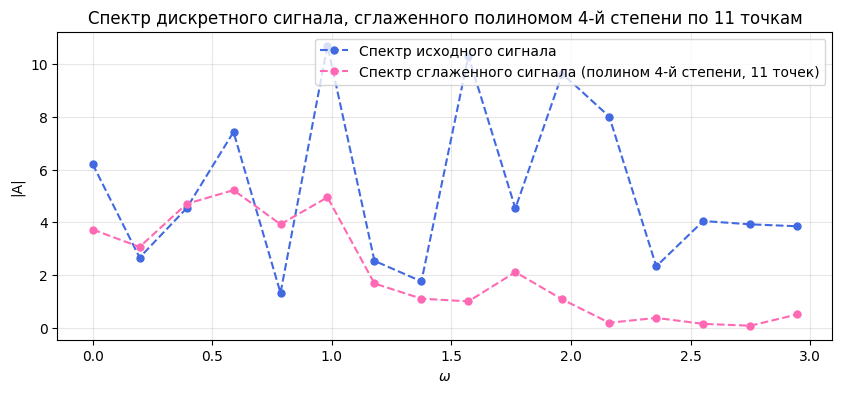

In [21]:
# Спектр сглаженного сигнала (четвёртой степени 11 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_Q_11], 'o--', color='hotpink', label='Спектр сглаженного сигнала (полином 4-й степени, 11 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного полиномом 4-й степени по 11 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Интерпретация:** На данных графиках видно, что полоса пропускания стала немного шире относительно предыдущего фильтра. Также при удалении от 0 полоса пропускания уменьшается, и при увеличении количества точек полоса пропускания уменьшается. Полученный результат соответствует значениям $H(\omega)$, полученным в предыдущей практической работе.


## Выводы

В результате выполнения работы был сформирован дискретный сигнал посредством дискретизации непрерывного сигнала в виде линейной комбинации 11 косинусоид вида $A_k\cos(\omega_k t + \varphi_k)$, для которых были случайно сгенерированы амплитуды и фазы. Для данного дискретного сигнала был построен дискретный спектр с помощью дискретного преобразования Фурье.

Для дискретного сигнала были применены следующие методы сглаживания:

1. **Линейное сглаживание** по 5 и 9 точкам
2. **Сглаживание полиномом 2-й степени** по 5 и 9 точкам
3. **Сглаживание полиномом 4-й степени** по 7 и 11 точкам

Для всех сглаженных сигналов было применено дискретное преобразование Фурье для нахождения спектра сглаженного сигнала.

**Основные наблюдения:**

- Линейное сглаживание наиболее сильно подавляет высокие частоты, что соответствует его функции низкочастотного фильтра.
- Сглаживание полиномом 2-й степени имеет более широкую полосу пропускания по сравнению с линейным, что позволяет лучше сохранять детали сигнала.
- Сглаживание полиномом 4-й степени обеспечивает наилучшее сохранение формы сигнала в полосе пропускания.
- При увеличении количества точек во всех фильтрах наблюдается более сильное подавление высоких частот и более резкий спад частотной характеристики.
- Результаты фильтрации соответствуют теоретическим передаточным функциям $H(\omega)$, полученным аналитически в предыдущих работах.

Таким образом, работа позволила получить практические навыки применения полиномиальных фильтров для обработки дискретных сигналов и анализа их частотных характеристик с помощью ДПФ.
